# Importação de bilbiotecas

Atualização do matplotlib

In [ ]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 4.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Análise e gráficos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

Series Temporais

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# DataFrame único

In [ ]:
dados_2019 = pd.read_csv('vendas_linha_petshop_2019.csv', encoding = "ISO-8859-1", sep=';', decimal='.')

dados_2020 = pd.read_csv('vendas_linha_petshop_2020.csv', encoding = "ISO-8859-1", sep=';', decimal='.')

dados_2021 = pd.read_csv('vendas_linha_petshop_2021.csv', encoding = "ISO-8859-1", sep=';', decimal='.')

dados_2022 = pd.read_csv('vendas_linha_petshop_2022.csv', encoding = "ISO-8859-1", sep=';', decimal='.')

df_concat = pd.concat([dados_2019,dados_2020,dados_2021,dados_2022])

In [ ]:
df_concat.shape

(200786, 14)

In [ ]:
df_concat.dtypes

cod_pedido              int64
regiao_pais            object
produto                object
valor                  object
quantidade             object
valor_total_bruto      object
data                   object
estado                 object
formapagto             object
centro_distribuicao    object
responsavelpedido      object
valor_comissao         object
lucro_liquido          object
categoriaprod          object
dtype: object

## Resolvendo dados missing


Primeiro foi realizada a conversão dos tipos de dados para a manipulação dos mesmos, e então foi feita a remoção dos valores nulos da coluna quantidade.

In [ ]:
df_concat.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,1,Norte,Biscoito True Champion 300g,22,2.0,44,13/06/2019,Acre,Dinheiro,Rapid Pink,Carlos,"0,44","17,6",Alimentação
1,2,Norte,Biscoito True Champion 300g,21,2.0,42,03/01/2019,Amapá,Pix,Rapid Pink,Maria Linda,"0,42","16,8",Alimentação
2,3,Norte,Biscoito True Champion 300g,22,NaN,44,18/01/2019,Pará,Boleto Bancário,Rapid Pink,Julia,"0,88","35,2",Alimentação
3,4,Norte,Biscoito True Champion 300g,19,4.0,88,19/08/2019,Rondônia,Boleto Bancário,Rapid Pink,Yuri,"0,76","30,4",Alimentação
4,5,Norte,Biscoito True Champion 300g,22,2.0,44,18/10/2019,Tocantins,Cartão Crédito,Rapid Pink,Dolores,"0,44","17,6",Alimentação


In [ ]:
df_concat.dtypes

cod_pedido              int64
regiao_pais            object
produto                object
valor                  object
quantidade             object
valor_total_bruto      object
data                   object
estado                 object
formapagto             object
centro_distribuicao    object
responsavelpedido      object
valor_comissao         object
lucro_liquido          object
categoriaprod          object
dtype: object

In [ ]:
# Remoção dos valores nulos
df_concat = df_concat.dropna()

In [ ]:
# Transformação dos tipos de dados
df_concat['quantidade'] = df_concat['quantidade'].astype(str)
df_concat["quantidade"] = df_concat["quantidade"].str.replace(' ','')
df_concat["quantidade"] = df_concat["quantidade"].str.replace('nan','')
df_concat["quantidade"] = pd.to_numeric(df_concat["quantidade"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_concat['valor'] = df_concat['valor'].astype(str)
df_concat["valor"] = df_concat["valor"].str.replace(',','.')
df_concat["valor"] = pd.to_numeric(df_concat["valor"])

In [ ]:
df_concat['valor_total_bruto'] = df_concat['valor_total_bruto'].astype(str)
df_concat["valor_total_bruto"] = df_concat["valor_total_bruto"].str.replace(',','.')
df_concat["valor_total_bruto"] = df_concat["valor_total_bruto"].str.replace('nan','')
df_concat["valor_total_bruto"] = pd.to_numeric(df_concat["valor_total_bruto"])

In [ ]:
df_concat['valor_comissao'] = df_concat['valor_comissao'].astype(str)
df_concat["valor_comissao"] = df_concat["valor_comissao"].str.replace(',','.')
df_concat["valor_comissao"] = pd.to_numeric(df_concat["valor_comissao"])

In [ ]:
df_concat['lucro_liquido'] = df_concat['lucro_liquido'].astype(str)
df_concat["lucro_liquido"] = df_concat["lucro_liquido"].str.replace(',','.')
df_concat["lucro_liquido"] = pd.to_numeric(df_concat["lucro_liquido"])

In [ ]:
df_concat['data'] = pd.to_datetime(df_concat['data'])

In [ ]:
df_concat = df_concat.dropna()

## Corrindo colunas incosistentes

In [ ]:
df_concat.loc[round(df_concat['quantidade'] * df_concat['valor']) != round(df_concat['valor_total_bruto'])]

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
3,4,Norte,Biscoito True Champion 300g,19.00,4.0,88.0,2019-08-19,Rondônia,Boleto Bancário,Rapid Pink,Yuri,0.76,30.4,Alimentação
11,12,Nordeste,Biscoito True Champion 300g,20.00,3.0,54.0,2019-05-17,Alagoas,Cartão Débito,Gold Beach,Marta,0.60,24.0,Alimentação
14,15,Nordeste,Biscoito True Champion 300g,20.00,2.0,0.0,2019-02-12,Maranhão,Boleto Bancário,Gold Beach,Clarice,0.40,16.0,Alimentação
26,27,Norte,Bola Pet Vinil Big Blue,22.00,1.0,0.0,2019-01-04,Amapá,Cartão Crédito,Rapid Pink,Maria Linda,0.22,8.8,Brinquedo
38,39,Nordeste,Bola Pet Vinil Big Blue,18.00,1.0,0.0,2019-03-13,Ceará,Pix,Gold Beach,Neide,0.18,7.2,Brinquedo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,155745,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,1342.98,1.0,765.0,2022-03-13,Maranhão,Dinheiro,Gold Beach,Clarice,55.44,237.6,Bebedouros e Comedouros
5257,155838,Centro Oeste,Biscoito Pedigree Biscrok Multi para Cães Adul...,48.60,1.0,7.0,2022-01-31,Goiás,Cartão Crédito,Grãos Blue,Maria Clara,0.81,8.1,Petisco
5381,155962,Norte,Bandana Disney Mickey Fábrica Petti,11.34,2.0,44.0,2022-02-14,Amazonas,Boleto Bancário,Rapid Pink,Silvia,0.24,8.4,Acessório
5474,156055,Sul,Cama média almofadada Pity,92.34,1.0,3.0,2022-03-04,Rio Grande do Sul,Pix,Tree True,Vivian,0.51,30.6,Acessório


In [ ]:
inconsistencias = df_concat[round(df_concat['quantidade'] * df_concat['valor']) != round(df_concat['valor_total_bruto'])].index
df_concat = df_concat.drop(inconsistencias)

In [ ]:
df_concat.loc[round(df_concat['quantidade'] * df_concat['valor']) != round(df_concat['valor_total_bruto'])]

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod


In [ ]:
df_concat.dtypes

cod_pedido                      int64
regiao_pais                    object
produto                        object
valor                         float64
quantidade                    float64
valor_total_bruto             float64
data                   datetime64[ns]
estado                         object
formapagto                     object
centro_distribuicao            object
responsavelpedido              object
valor_comissao                float64
lucro_liquido                 float64
categoriaprod                  object
dtype: object

In [ ]:
df_concat.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,1,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,2019-06-13,Acre,Dinheiro,Rapid Pink,Carlos,0.44,17.6,Alimentação
1,2,Norte,Biscoito True Champion 300g,21.0,2.0,42.0,2019-03-01,Amapá,Pix,Rapid Pink,Maria Linda,0.42,16.8,Alimentação
4,5,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,2019-10-18,Tocantins,Cartão Crédito,Rapid Pink,Dolores,0.44,17.6,Alimentação
5,6,Norte,Biscoito True Champion 300g,19.0,4.0,76.0,2019-09-19,Roraima,Cartão Débito,Rapid Pink,Adriana,0.76,30.4,Alimentação
6,7,Norte,Biscoito True Champion 300g,21.0,3.0,63.0,2019-09-06,Amazonas,Pix,Rapid Pink,Silvia,0.63,25.2,Alimentação


## Dados dos anos

In [ ]:
dados_2019 = df_concat[pd.DatetimeIndex(df_concat['data']).year == 2019]
dados_2019.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,1,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,2019-06-13,Acre,Dinheiro,Rapid Pink,Carlos,0.44,17.6,Alimentação
1,2,Norte,Biscoito True Champion 300g,21.0,2.0,42.0,2019-03-01,Amapá,Pix,Rapid Pink,Maria Linda,0.42,16.8,Alimentação
4,5,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,2019-10-18,Tocantins,Cartão Crédito,Rapid Pink,Dolores,0.44,17.6,Alimentação
5,6,Norte,Biscoito True Champion 300g,19.0,4.0,76.0,2019-09-19,Roraima,Cartão Débito,Rapid Pink,Adriana,0.76,30.4,Alimentação
6,7,Norte,Biscoito True Champion 300g,21.0,3.0,63.0,2019-09-06,Amazonas,Pix,Rapid Pink,Silvia,0.63,25.2,Alimentação


In [ ]:
dados_2020 = df_concat[pd.DatetimeIndex(df_concat['data']).year == 2020]
dados_2020.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,50284,Norte,Biscoito True Champion 300g,24.64,2.0,49.28,2020-12-03,Acre,Cartão Crédito,Rapid Pink,Carlos,1.76,26.4,Alimentação
1,50285,Norte,Biscoito True Champion 300g,23.52,2.0,47.04,2020-10-04,Amapá,Cartão Crédito,Rapid Pink,Maria Linda,1.68,25.2,Alimentação
2,50286,Norte,Biscoito True Champion 300g,24.64,4.0,98.56,2020-07-08,Pará,Dinheiro,Rapid Pink,Julia,3.52,52.8,Alimentação
5,50289,Norte,Biscoito True Champion 300g,21.28,4.0,85.12,2020-04-05,Roraima,Boleto Bancário,Rapid Pink,Adriana,3.04,45.6,Alimentação
6,50290,Norte,Biscoito True Champion 300g,23.52,3.0,70.56,2020-12-17,Amazonas,Cartão Crédito,Rapid Pink,Silvia,2.52,37.8,Alimentação


In [ ]:
dados_2021 = df_concat[pd.DatetimeIndex(df_concat['data']).year == 2021]
dados_2021.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,100567,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,1020.11,1.0,1020.11,2021-02-11,Ceará,Cartão Crédito,Gold Beach,Neide,53.69,230.1,Bebedouros e Comedouros
1,100568,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,1135.82,1.0,1135.82,2021-12-19,Maranhão,Cartão Crédito,Gold Beach,Clarice,59.78,256.2,Bebedouros e Comedouros
2,100569,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,1054.69,1.0,1054.69,2021-09-16,Paraíba,Boleto Bancário,Gold Beach,Cristina,55.51,237.9,Bebedouros e Comedouros
4,100571,Sudeste,Nutri Alimentador Inteligente Automático Câmer...,1173.06,1.0,1173.06,2021-11-27,Piauí,Dinheiro,Gold Beach,Cristian,61.74,264.6,Bebedouros e Comedouros
5,100572,Sudeste,Nutri Alimentador Inteligente Automático Câmer...,1163.75,2.0,2327.50,2021-11-02,São Paulo,Pix,Papa Léguas,Miriam,122.50,525.0,Bebedouros e Comedouros


In [ ]:
dados_2022 = df_concat[pd.DatetimeIndex(df_concat['data']).year == 2022]
dados_2022.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,150581,Norte,Biscoito True Champion 300g,35.64,22.0,784.08,2022-01-03,Acre,Pix,Rapid Pink,Carlos,4.84,193.6,Alimentação
1,150582,Norte,Biscoito True Champion 300g,34.02,2.0,68.04,2022-02-19,Amapá,Boleto Bancário,Rapid Pink,Maria Linda,0.42,16.8,Alimentação
2,150583,Norte,Biscoito True Champion 300g,35.64,4.0,142.56,2022-02-19,Pará,Boleto Bancário,Rapid Pink,Julia,0.88,35.2,Alimentação
4,150585,Norte,Biscoito True Champion 300g,35.64,2.0,71.28,2022-03-18,Tocantins,Dinheiro,Rapid Pink,Dolores,0.44,17.6,Alimentação
5,150586,Norte,Biscoito True Champion 300g,30.78,4.0,123.12,2022-07-01,Roraima,Boleto Bancário,Rapid Pink,Adriana,0.76,30.4,Alimentação


## Lidando com outilers na coluna quantidade

In [ ]:
df_unico = df_concat
df_unico['std*1.96'] = 1.96*df_concat['quantidade'].std()
df_unico['Outlier'] = abs(df_concat['quantidade'] - df_concat['quantidade'].mean()) > df_unico['std*1.96']
outliers_df_concat = df_concat.loc[df_concat['Outlier'] == True]
df_unico['Outlier'].value_counts()[True]

5938

In [ ]:
outliers_df_concat.shape

(5938, 16)

In [ ]:
outliers_df_concat.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,std*1.96,Outlier
count,5938.000000,5938,5938,5938.000000,5938.000000,5938.000000,5938,5938,5938,5938,5938,5938.000000,5938.000000,5938,5.938000e+03,5938
unique,NaN,5,24,NaN,NaN,NaN,506,25,5,5,25,NaN,NaN,7,NaN,1
top,NaN,Norte,Penas Gatito,NaN,NaN,NaN,2022-01-03 00:00:00,Paraná,Cartão Débito,Rapid Pink,Beatriz,NaN,NaN,Acessório,NaN,True
freq,NaN,1689,284,NaN,NaN,NaN,466,268,1216,1689,268,NaN,NaN,1539,NaN,5938
first,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,97570.921354,NaN,NaN,110.933963,68.535029,7276.248269,NaN,NaN,NaN,NaN,NaN,283.150694,2655.832120,NaN,2.362793e+01,NaN
std,57386.403909,NaN,NaN,219.707083,22.254266,14705.565031,NaN,NaN,NaN,NaN,NaN,858.094118,4084.370654,NaN,2.177997e-12,NaN
min,157.000000,NaN,NaN,5.000000,30.000000,179.200000,NaN,NaN,NaN,NaN,NaN,3.720000,48.000000,NaN,2.362793e+01,NaN
25%,49000.250000,NaN,NaN,27.540000,45.000000,1676.850000,NaN,NaN,NaN,NaN,NaN,26.880000,648.000000,NaN,2.362793e+01,NaN


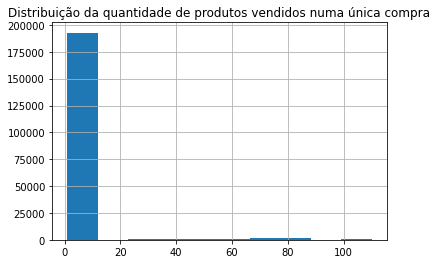

In [ ]:
df_concat['quantidade'].hist()
plt.title("Distribuição da quantidade de produtos vendidos numa única compra")
plt.show()

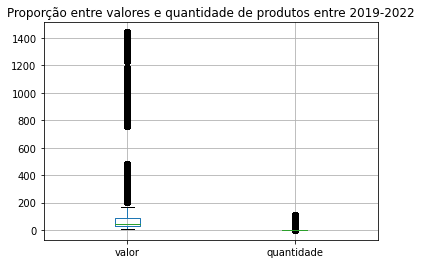

In [ ]:
df_concat[['valor', 'quantidade']].boxplot()
plt.title('Proporção entre valores e quantidade de produtos entre 2019-2022')
plt.show()

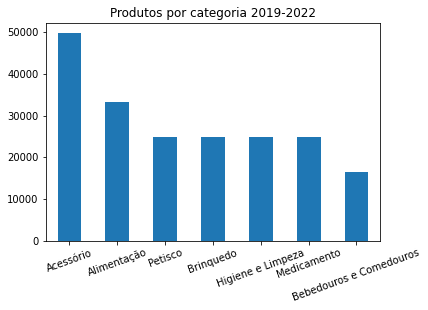

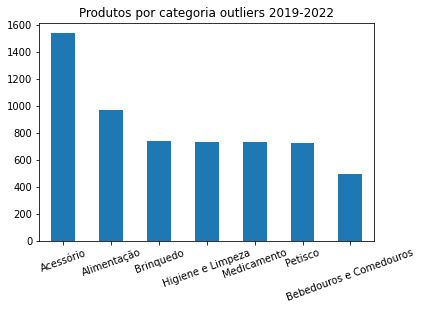

In [ ]:
plt.subplots()
df_concat['categoriaprod'].value_counts().plot(kind='bar', title='Produtos por categoria 2019-2022')
plt.xticks(rotation=20)
plt.show()

plt.subplots()
outliers_df_concat['categoriaprod'].value_counts().plot(kind='bar', title='Produtos por categoria outliers 2019-2022')
plt.xticks(rotation=20)
plt.show()

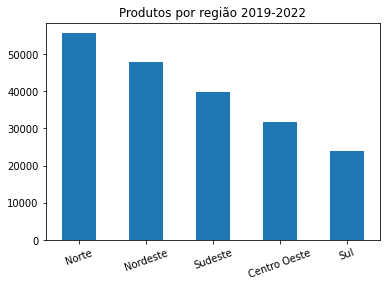

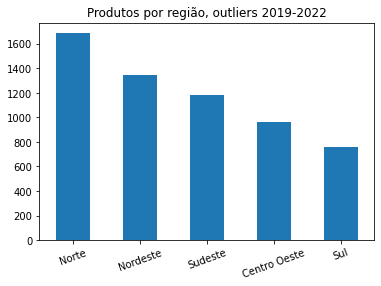

In [ ]:
plt.subplots()
df_concat['regiao_pais'].value_counts().plot(kind='bar', title='Produtos por região 2019-2022')
plt.xticks(rotation=20)
plt.show()

plt.subplots()
outliers_df_concat['regiao_pais'].value_counts().plot(kind='bar', title='Produtos por região, outliers 2019-2022')
plt.xticks(rotation=20)
plt.show()

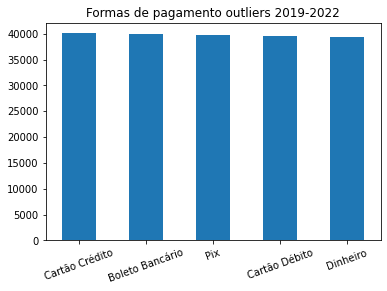

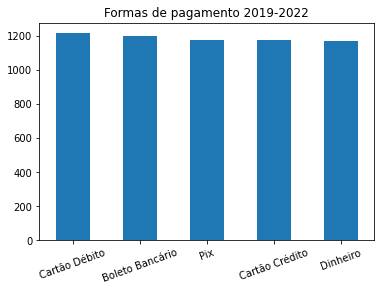

In [ ]:
plt.subplots()

df_concat['formapagto'].value_counts().plot(kind='bar', title='Formas de pagamento outliers 2019-2022')
plt.xticks(rotation=20)
plt.show()

plt.subplots()

outliers_df_concat['formapagto'].value_counts().plot(kind='bar', title='Formas de pagamento 2019-2022')
plt.xticks(rotation=20)
plt.show()

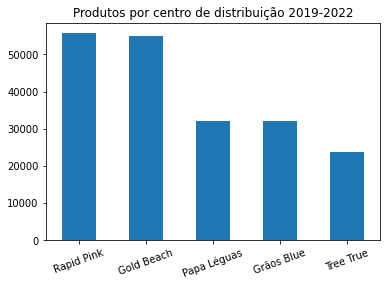

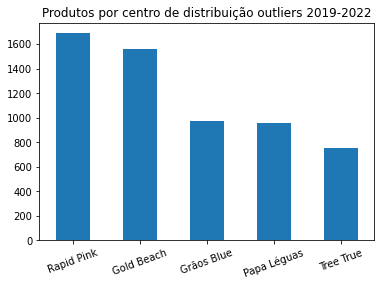

In [ ]:
plt.subplots()
df_concat['centro_distribuicao'].value_counts().plot(kind='bar', title='Produtos por centro de distribuição 2019-2022')
plt.xticks(rotation=20)
plt.show()

plt.subplots()
outliers_df_concat['centro_distribuicao'].value_counts().plot(kind='bar', title='Produtos por centro de distribuição outliers 2019-2022')
plt.xticks(rotation=20)
plt.show()

In [ ]:
lucro_total = df_concat['lucro_liquido'].sum()
quantidade_total = df_concat['quantidade'].sum()

lucro_outliers = outliers_df_concat['lucro_liquido'].sum()
quantidade_outliers = outliers_df_concat['quantidade'].sum()

In [ ]:
print('Quantidade de unidades vendidas:{:,} \nLucro líquido total: R${:,.2f}'.format(quantidade_total, lucro_total))

Quantidade de unidades vendidas:726,262.0 
Lucro líquido total: R$26,974,998.34


In [ ]:
print('Quantidade de unidades vendidas:{:,} \nLucro líquido outliers: R${:,.2f}'.format(quantidade_outliers, lucro_outliers))

Quantidade de unidades vendidas:406,961.0 
Lucro líquido outliers: R$15,770,331.13


In [ ]:
quantidade_pct = (quantidade_outliers * 100) / quantidade_total
print("Porcetagem de unidades vendidas ocasionadas por outliers: {:.2f}%".format(quantidade_pct))

Porcetagem de unidades vendidas ocasionadas por outliers: 56.04%


In [ ]:
lucro_pct = (lucro_outliers * 100) / lucro_total
print("Porcetagem de lucro ocasionado por outliers: {:.2f}%".format(lucro_pct))

Porcetagem de lucro ocasionado por outliers: 58.46%


In [ ]:
df_concat.loc[df_concat["quantidade"].isna()]

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,std*1.96,Outlier


## Aplicando técnica de séries temporais em um produto



### Produto escolhido: Cama Coração Coroa Pet Nest Almofada Lavável

### Criando o gráfico para a série de quantidade do produto por mês e ano.

In [ ]:
dados_produto = df_concat[df_concat["produto"] == "Cama Coração Coroa Pet Nest Almofada Lavável"]
dados_produto

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,std*1.96,Outlier
509,510,Norte,Cama Coração Coroa Pet Nest Almofada Lavável,90.00,1.0,90.00,2019-02-21,Acre,Dinheiro,Rapid Pink,Carlos,1.88,56.4,Acessório,23.627926,False
510,511,Norte,Cama Coração Coroa Pet Nest Almofada Lavável,94.00,1.0,94.00,2019-05-21,Amapá,Boleto Bancário,Rapid Pink,Maria Linda,1.90,57.0,Acessório,23.627926,False
511,512,Norte,Cama Coração Coroa Pet Nest Almofada Lavável,83.00,1.0,83.00,2019-09-27,Pará,Cartão Débito,Rapid Pink,Julia,1.62,48.6,Acessório,23.627926,False
512,513,Norte,Cama Coração Coroa Pet Nest Almofada Lavável,94.00,1.0,94.00,2019-03-02,Rondônia,Cartão Crédito,Rapid Pink,Yuri,1.78,53.4,Acessório,23.627926,False
513,514,Norte,Cama Coração Coroa Pet Nest Almofada Lavável,81.00,1.0,81.00,2019-03-20,Tocantins,Dinheiro,Rapid Pink,Dolores,1.72,51.6,Acessório,23.627926,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50370,200951,Sudeste,Cama Coração Coroa Pet Nest Almofada Lavável,132.84,1.0,132.84,2022-03-30,Rio de Janeiro,Cartão Crédito,Papa Léguas,Antonio,4.10,49.2,Acessório,23.627926,False
50371,200952,Sudeste,Cama Coração Coroa Pet Nest Almofada Lavável,152.28,1.0,152.28,2022-02-04,Espírito Santo,Cartão Débito,Papa Léguas,Tereza,4.20,50.4,Acessório,23.627926,False
50372,200953,Sul,Cama Coração Coroa Pet Nest Almofada Lavável,134.46,1.0,134.46,2022-02-25,Paraná,Boleto Bancário,Tree True,Beatriz,4.60,55.2,Acessório,23.627926,False
50373,200954,Sul,Cama Coração Coroa Pet Nest Almofada Lavável,157.14,1.0,157.14,2022-03-14,Santa Catarina,Pix,Tree True,Vitória,4.35,52.2,Acessório,23.627926,False


In [ ]:
dados_produto_analises = dados_produto[['data', 'quantidade']]
dados_produto_analises.set_index('data', inplace = True)
dados_produto_analises.head()

,quantidade
data,
2019-02-21,1.0
2019-05-21,1.0
2019-09-27,1.0
2019-03-02,1.0
2019-03-20,1.0


In [ ]:
dados_produto_analises = dados_produto_analises.sort_values(by='data')
dados_produto_analises

,quantidade
data,
2019-01-01,1.0
2019-01-01,1.0
2019-01-02,1.0
2019-01-02,1.0
2019-01-02,1.0
...,...
2022-12-04,1.0
2022-12-04,1.0
2022-12-04,1.0


In [ ]:
dados_produto_analises_agg = dados_produto_analises.groupby(pd.Grouper(freq='M')).sum()
dados_produto_analises_agg.head()

,quantidade
data,
2019-01-31,870.0
2019-02-28,270.0
2019-03-31,593.0
2019-04-30,1106.0
2019-05-31,770.0


In [ ]:
dados_produto_analises_agg.shape

(48, 1)

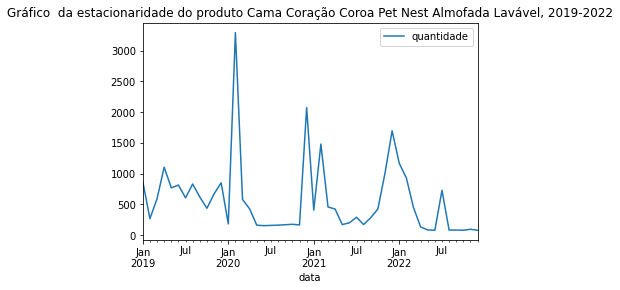

In [ ]:
dados_produto_analises_agg.plot()
plt.title('Gráfico  da estacionaridade do produto Cama Coração Coroa Pet Nest Almofada Lavável, 2019-2022')
plt.show()

### Aplicando o teste de estacionariedade e verificando a necessidade de transformação

Para o teste de estacionaridade, a função não lida muito bem com intervalos de tempo muito extensos, então será realizada o teste nos 4 anos sucessivamente.

Teste feito no DataFrame contendo os 4 anos

In [ ]:
teste_adf = adfuller(dados_produto_analises_agg['quantidade'])

In [ ]:
print('Estatística ADF: {:.4}'.format(teste_adf[0]))

Estatística ADF: -5.902


In [ ]:
print('p-value: {:.4}'.format(teste_adf[1]))

p-value: 2.768e-07


O p-value foi menor que 0,05. Isto indica que a série é estacionária, logo não há necessidade de transformação.

### Teste no ano de 2019

In [ ]:
dados_produto = dados_2019[dados_2019["produto"] == "Cama Coração Coroa Pet Nest Almofada Lavável"]

dados_produto_analises = dados_produto[['data', 'quantidade']]
dados_produto_analises.set_index('data', inplace = True)

dados_produto_analises = dados_produto_analises.sort_values(by='data')

dados_produto_analises_agg = dados_produto_analises.groupby(pd.Grouper(freq='M')).sum()

teste_adf = adfuller(dados_produto_analises_agg['quantidade'])

print('Estatística ADF: {:.4}'.format(teste_adf[0]))

print('p-value: {:.4}'.format(teste_adf[1]))

Estatística ADF: -3.298
p-value: 0.01496


### Teste no ano de 2020

In [ ]:
dados_produto = dados_2020[dados_2020["produto"] == "Cama Coração Coroa Pet Nest Almofada Lavável"]

dados_produto_analises = dados_produto[['data', 'quantidade']]
dados_produto_analises.set_index('data', inplace = True)

dados_produto_analises = dados_produto_analises.sort_values(by='data')

dados_produto_analises_agg_2020 = dados_produto_analises.groupby(pd.Grouper(freq='M')).sum()

teste_adf = adfuller(dados_produto_analises_agg_2020['quantidade'])

print('Estatística ADF: {:.4}'.format(teste_adf[0]))

print('p-value: {:.4}'.format(teste_adf[1]))

Estatística ADF: -1.818
p-value: 0.3717


### Teste no ano de 2021

In [ ]:
dados_produto = dados_2021[dados_2021["produto"] == "Cama Coração Coroa Pet Nest Almofada Lavável"]

dados_produto_analises = dados_produto[['data', 'quantidade']]
dados_produto_analises.set_index('data', inplace = True)

dados_produto_analises = dados_produto_analises.sort_values(by='data')

dados_produto_analises_agg_2021 = dados_produto_analises.groupby(pd.Grouper(freq='M')).sum()

teste_adf = adfuller(dados_produto_analises_agg_2021['quantidade'])

print('Estatística ADF: {:.4}'.format(teste_adf[0]))

print('p-value: {:.4}'.format(teste_adf[1]))

Estatística ADF: -1.225
p-value: 0.6627


### Teste no ano de 2022

In [ ]:
dados_produto = dados_2022[dados_2022["produto"] == "Cama Coração Coroa Pet Nest Almofada Lavável"]

dados_produto_analises = dados_produto[['data', 'quantidade']]
dados_produto_analises.set_index('data', inplace = True)

dados_produto_analises = dados_produto_analises.sort_values(by='data')

dados_produto_analises_agg_2022 = dados_produto_analises.groupby(pd.Grouper(freq='M')).sum()

teste_adf = adfuller(dados_produto_analises_agg_2022['quantidade'])

print('Estatística ADF: {:.4}'.format(teste_adf[0]))

print('p-value: {:.4}'.format(teste_adf[1]))

Estatística ADF: -2.714
p-value: 0.0717


### Aplicando o teste de estacionariedade da série transformada.


Ano de 2020

In [ ]:
teste_adf = adfuller(dados_produto_analises_agg_2020['quantidade'].diff().dropna())
print('Estatística ADF: {:.4}'.format(teste_adf[0]))
print('p-value: {:.4}'.format(teste_adf[1]))

Estatística ADF: -1.274
p-value: 0.6411


In [ ]:
dados_2020_intg2 = dados_produto_analises_agg_2020['quantidade'].diff().dropna()

In [ ]:
teste_adf = adfuller(dados_2020_intg2.diff().dropna())
print('Estatística ADF: {:.4}'.format(teste_adf[0]))
print('p-value: {:.4}'.format(teste_adf[1]))

Estatística ADF: -12.46
p-value: 3.464e-23


Ano de 2021

In [ ]:
teste_adf = adfuller(dados_produto_analises_agg_2021['quantidade'].diff().dropna())
print('Estatística ADF: {:.4}'.format(teste_adf[0]))
print('p-value: {:.4}'.format(teste_adf[1]))

Estatística ADF: -4.146
p-value: 0.0008119


Ano de 2022

In [ ]:
teste_adf = adfuller(dados_produto_analises_agg_2022['quantidade'].diff().dropna())
print('Estatística ADF: {:.4}'.format(teste_adf[0]))
print('p-value: {:.4}'.format(teste_adf[1]))

Estatística ADF: -3.519
p-value: 0.007503


### Criando o gráfico da série transformada.


2020 antes e depois da transformação

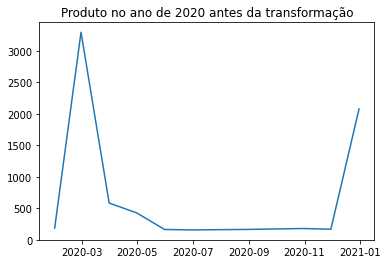

In [ ]:
plt.plot(dados_produto_analises_agg_2020)
plt.title('Produto no ano de 2020 antes da transformação')
plt.show()

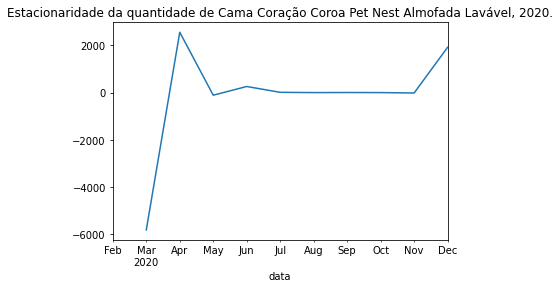

In [ ]:
dados_2020_intg2.diff().plot(legend = None)
plt.title('Estacionaridade da quantidade de Cama Coração Coroa Pet Nest Almofada Lavável, 2020.')
plt.show()

2021 antes e depois da transformação

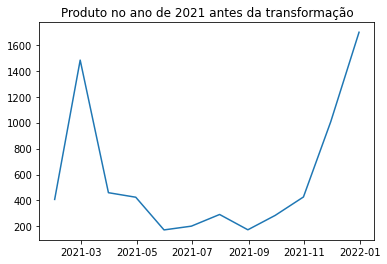

In [ ]:
plt.plot(dados_produto_analises_agg_2021)
plt.title('Produto no ano de 2021 antes da transformação')
plt.show()

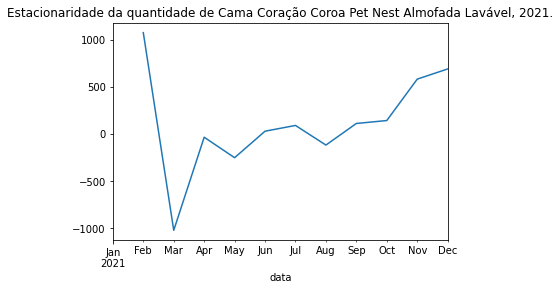

In [ ]:
dados_produto_analises_agg_2021.diff().plot(legend = None)
plt.title('Estacionaridade da quantidade de Cama Coração Coroa Pet Nest Almofada Lavável, 2021.')
plt.show()

2022 antes e depois da transformação

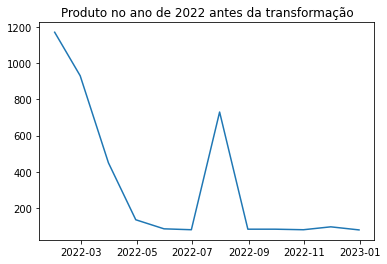

In [ ]:
plt.plot(dados_produto_analises_agg_2022)
plt.title('Produto no ano de 2022 antes da transformação')
plt.show()

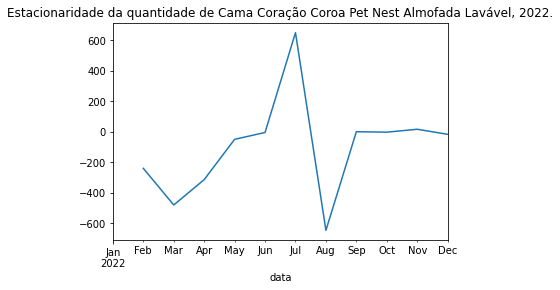

In [ ]:
dados_produto_analises_agg_2022.diff().plot(legend = None)
plt.title('Estacionaridade da quantidade de Cama Coração Coroa Pet Nest Almofada Lavável, 2022.')
plt.show()

## Calculando a média e mediana por categoria de produto e o ranking dos produtos mais vendidos.

### Análise exploratória

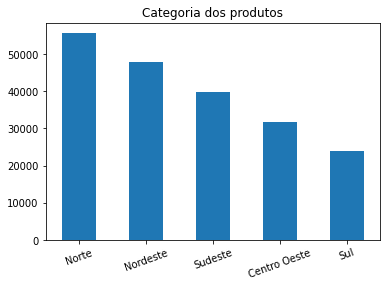

In [ ]:
df_concat['regiao_pais'].value_counts().plot(kind='bar', title='Categoria dos produtos')
plt.xticks(rotation=20)
plt.show()

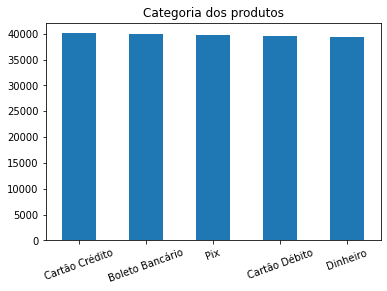

In [ ]:
df_concat['formapagto'].value_counts().plot(kind='bar', title='Categoria dos produtos')
plt.xticks(rotation=20)
plt.show()

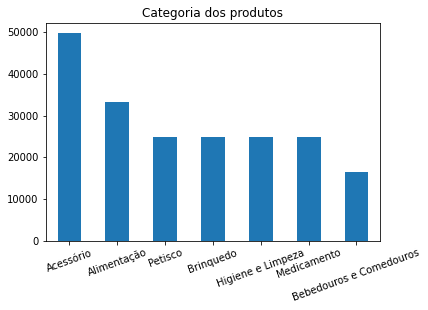

In [ ]:
df_concat['categoriaprod'].value_counts().plot(kind='bar', title='Categoria dos produtos')
plt.xticks(rotation=20)
plt.show()

In [ ]:
produtos = df_concat.groupby("produto").sum().reset_index()
produtos = produtos.drop('cod_pedido', axis=1)
produtos.head()

,produto,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido,std*1.96,Outlier
0,Antipulgas e Carrapatos MSD Bravecto para Pet ...,2946919.74,31856.0,11087638.03,331493.90,4930836.3,195237.553628,231
1,Bandana Disney Mickey Fábrica Petti,99741.39,32847.0,383046.43,6233.10,215794.0,196442.577861,250
2,Bebedouro e Comedouro Automático para Cães e G...,414176.45,24309.0,1182744.50,28840.80,481495.1,195048.530219,237
3,Biscoito True Champion 300g,216762.12,38564.0,999699.79,16071.23,320518.4,195355.693259,227
4,Biscoito Pedigree Biscrok Multi para Cães Adul...,305150.40,32023.0,1147119.46,27846.42,279894.9,196064.531043,231


In [ ]:
categoria_prod = df_concat.groupby("categoriaprod").mean().reset_index()
categoria_prod = categoria_prod.drop(['cod_pedido', 'std*1.96'], axis=1)
categoria_prod.sort_values(by='valor', ascending = False).reset_index(drop=True)

,categoriaprod,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido,Outlier
0,Bebedouros e Comedouros,548.424265,3.040341,1669.913079,92.417085,420.869644,0.029938
1,Medicamento,162.120379,3.940534,613.602498,18.214915,272.734729,0.029451
2,Alimentação,114.076612,4.181061,443.265662,7.240102,157.151446,0.029201
3,Acessório,55.214104,3.353061,172.253979,4.925532,78.741409,0.030948
4,Higiene e Limpeza,50.258128,3.387721,157.003246,4.507674,103.015970,0.029589
5,Petisco,28.314525,3.961032,108.742476,3.062598,30.772461,0.029206
6,Brinquedo,20.413956,3.626509,73.169218,1.133617,32.072937,0.029907


In [ ]:
categoria_prod = df_concat.groupby("categoriaprod").median().reset_index()
categoria_prod = categoria_prod.drop(['cod_pedido', 'std*1.96'], axis=1)
categoria_prod

,categoriaprod,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido,Outlier
0,Acessório,49.00,1.0,55.00,1.24,23.40,0.0
1,Alimentação,90.00,2.0,134.33,2.02,49.00,0.0
2,Bebedouros e Comedouros,760.00,1.0,775.00,53.27,229.20,0.0
3,Brinquedo,19.95,1.0,24.30,0.39,12.24,0.0
4,Higiene e Limpeza,39.90,1.0,62.00,1.38,40.00,0.0
5,Medicamento,80.64,2.0,184.68,5.52,77.00,0.0
6,Petisco,31.36,2.0,46.98,1.36,13.60,0.0


In [ ]:
categoria_prod.describe()

,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido,Outlier
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.0
mean,152.978571,1.428571,183.184286,9.311429,63.491429,0.0
std,268.874248,0.534522,266.941780,19.454085,76.514538,0.0
min,19.950000,1.000000,24.300000,0.390000,12.240000,0.0
25%,35.630000,1.000000,50.990000,1.300000,18.500000,0.0
50%,49.000000,1.000000,62.000000,1.380000,40.000000,0.0
75%,85.320000,2.000000,159.505000,3.770000,63.000000,0.0
max,760.000000,2.000000,775.000000,53.270000,229.200000,0.0


In [ ]:
produtos = produtos.sort_values(by='quantidade')

In [ ]:
top5_vendas = produtos.iloc[19:24].reset_index(drop=True)

In [ ]:
top5_vendas = top5_vendas.sort_values(by='quantidade', ascending=False)

Text(0.5, 1.0, 'Top 5 produtos mais vendidos')

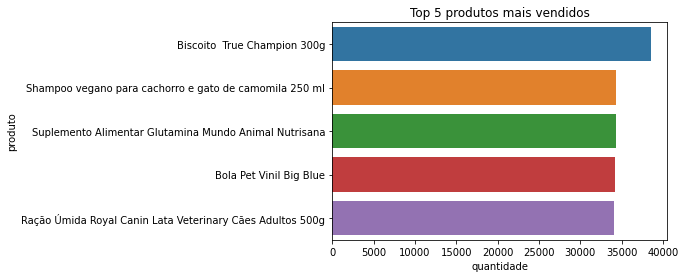

In [ ]:
sns.barplot(data=top5_vendas, x='quantidade', y='produto').set_title('Top 5 produtos mais vendidos')

In [ ]:
produtos = produtos.sort_values(by='lucro_liquido')
top5_lucros = produtos.iloc[19:24].reset_index(drop=True)

In [ ]:
top5_lucros = top5_lucros.sort_values(by='lucro_liquido', ascending=False)
top5_lucros

,produto,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido,std*1.96,Outlier
4,Nutri Alimentador Inteligente Automático Câmer...,8653470.35,25960.0,26427598.34,1499183.29,6477163.6,195615.600446,258
3,Antipulgas e Carrapatos MSD Bravecto para Pet ...,2946919.74,31856.0,11087638.03,331493.90,4930836.3,195237.553628,231
2,Ração Royal Canin Club Performance para Cães A...,2234641.15,32394.0,8445533.20,138393.81,2756742.9,195993.647264,234
1,"Ração Royal Canin Exigent Gatos Adultos 1,5Kg",1009657.09,33505.0,3971256.03,64665.90,1612953.6,195946.391412,249
0,Cama Coração Coroa Pet Nest Almofada Lavável,945755.91,27211.0,2966095.45,122041.27,1465448.3,195946.391412,277


Text(0.5, 1.0, 'Top 5 itens mais lucrativos (milhões)')

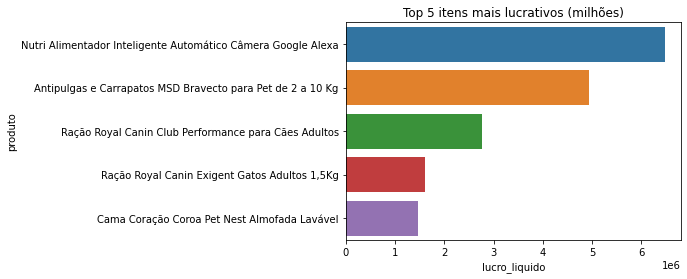

In [ ]:
sns.barplot(data=top5_lucros, x='lucro_liquido', y='produto').set_title('Top 5 itens mais lucrativos (milhões)')

# Dados 2019

##Análise exploratória

In [ ]:
dados_2019 = df_concat[pd.DatetimeIndex(df_concat['data']).year == 2019]

In [ ]:
print(dados_2019.groupby('categoriaprod').size())

categoriaprod
Acessório                  12429
Alimentação                 8307
Bebedouros e Comedouros     4164
Brinquedo                   6217
Higiene e Limpeza           6232
Medicamento                 6204
Petisco                     6247
dtype: int64


In [ ]:
dados_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49800 entries, 0 to 50282
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   cod_pedido           49800 non-null  int64         
 1   regiao_pais          49800 non-null  object        
 2   produto              49800 non-null  object        
 3   valor                49800 non-null  float64       
 4   quantidade           49800 non-null  float64       
 5   valor_total_bruto    49800 non-null  float64       
 6   data                 49800 non-null  datetime64[ns]
 7   estado               49800 non-null  object        
 8   formapagto           49800 non-null  object        
 9   centro_distribuicao  49800 non-null  object        
 10  responsavelpedido    49800 non-null  object        
 11  valor_comissao       49800 non-null  float64       
 12  lucro_liquido        49800 non-null  float64       
 13  categoriaprod        49800 non-

In [ ]:
dados_2019.tail()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,std*1.96,Outlier
50278,50279,Sudeste,Bandana Disney Mickey Fábrica Petti,10.0,3.0,30.0,2019-02-16,Rio de Janeiro,Cartão Débito,Papa Léguas,Antonio,0.48,16.8,Acessório,23.627926,False
50279,50280,Sudeste,Bandana Disney Mickey Fábrica Petti,9.0,2.0,18.0,2019-07-15,Espírito Santo,Boleto Bancário,Papa Léguas,Tereza,0.32,11.2,Acessório,23.627926,False
50280,50281,Sul,Bandana Disney Mickey Fábrica Petti,11.0,3.0,33.0,2019-06-05,Paraná,Cartão Crédito,Tree True,Beatriz,0.48,16.8,Acessório,23.627926,False
50281,50282,Sul,Bandana Disney Mickey Fábrica Petti,12.0,1.0,12.0,2019-05-27,Santa Catarina,Cartão Débito,Tree True,Vitória,0.26,9.1,Acessório,23.627926,False
50282,50283,Sul,Bandana Disney Mickey Fábrica Petti,11.0,3.0,33.0,2019-01-04,Rio Grande do Sul,Pix,Tree True,Vivian,0.66,23.1,Acessório,23.627926,False


In [ ]:
dados_2019.shape

(49800, 16)

In [ ]:
dados_2019.dtypes

cod_pedido                      int64
regiao_pais                    object
produto                        object
valor                         float64
quantidade                    float64
valor_total_bruto             float64
data                   datetime64[ns]
estado                         object
formapagto                     object
centro_distribuicao            object
responsavelpedido              object
valor_comissao                float64
lucro_liquido                 float64
categoriaprod                  object
std*1.96                      float64
Outlier                          bool
dtype: object

In [ ]:
dados_2019.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,std*1.96,Outlier
count,49800.000000,49800,49800,49800.00000,49800.000000,49800.00000,49800,49800,49800,49800,49800,49800.000000,49800.000000,49800,4.980000e+04,49800
unique,NaN,5,24,NaN,NaN,NaN,365,25,5,5,25,NaN,NaN,7,NaN,2
top,NaN,Norte,Biscoito Pedigree Biscrok Multi para Cães Adul...,NaN,NaN,NaN,2019-01-06 00:00:00,Bahia,Cartão Crédito,Rapid Pink,Sonia,NaN,NaN,Acessório,NaN,False
freq,NaN,13942,2085,NaN,NaN,NaN,161,2002,10105,13942,2002,NaN,NaN,12429,NaN,48264
first,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,25266.732410,NaN,NaN,87.71010,4.316104,375.70761,NaN,NaN,NaN,NaN,NaN,17.028797,165.662277,NaN,2.362793e+01,NaN
std,14439.068853,NaN,NaN,166.48509,15.254800,3155.12587,NaN,NaN,NaN,NaN,NaN,207.464587,1097.523369,NaN,1.650252e-11,NaN
min,1.000000,NaN,NaN,5.00000,1.000000,5.00000,NaN,NaN,NaN,NaN,NaN,0.100000,1.500000,NaN,2.362793e+01,NaN
25%,12816.750000,NaN,NaN,22.00000,1.000000,30.00000,NaN,NaN,NaN,NaN,NaN,0.640000,16.500000,NaN,2.362793e+01,NaN


In [ ]:
dados_2019.groupby('categoriaprod').mean()

,cod_pedido,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido,std*1.96,Outlier
categoriaprod,,,,,,,,
Acessório,25351.439858,43.580658,3.892188,167.617266,5.879651,93.714886,23.627926,0.030332
Alimentação,25227.244854,90.060190,4.810280,428.503912,8.589949,185.818888,23.627926,0.030095
Bebedouros e Comedouros,25239.031700,432.346782,3.659942,1766.120077,121.102426,545.414962,23.627926,0.030019
Brinquedo,25094.188355,16.094579,4.327811,70.738137,1.316580,38.860833,23.627926,0.031205
Higiene e Limpeza,25232.907574,39.656932,4.325257,167.835526,6.017312,133.326669,23.627926,0.034178
Medicamento,25262.714539,127.542876,4.645712,577.000645,21.142229,317.511291,23.627926,0.030464
Petisco,25378.621258,22.314551,4.591644,103.693933,3.598089,36.523771,23.627926,0.030094


In [ ]:
dados_2019

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,std*1.96,Outlier
0,1,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,2019-06-13,Acre,Dinheiro,Rapid Pink,Carlos,0.44,17.6,Alimentação,23.627926,False
1,2,Norte,Biscoito True Champion 300g,21.0,2.0,42.0,2019-03-01,Amapá,Pix,Rapid Pink,Maria Linda,0.42,16.8,Alimentação,23.627926,False
4,5,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,2019-10-18,Tocantins,Cartão Crédito,Rapid Pink,Dolores,0.44,17.6,Alimentação,23.627926,False
5,6,Norte,Biscoito True Champion 300g,19.0,4.0,76.0,2019-09-19,Roraima,Cartão Débito,Rapid Pink,Adriana,0.76,30.4,Alimentação,23.627926,False
6,7,Norte,Biscoito True Champion 300g,21.0,3.0,63.0,2019-09-06,Amazonas,Pix,Rapid Pink,Silvia,0.63,25.2,Alimentação,23.627926,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50278,50279,Sudeste,Bandana Disney Mickey Fábrica Petti,10.0,3.0,30.0,2019-02-16,Rio de Janeiro,Cartão Débito,Papa Léguas,Antonio,0.48,16.8,Acessório,23.627926,False
50279,50280,Sudeste,Bandana Disney Mickey Fábrica Petti,9.0,2.0,18.0,2019-07-15,Espírito Santo,Boleto Bancário,Papa Léguas,Tereza,0.32,11.2,Acessório,23.627926,False
50280,50281,Sul,Bandana Disney Mickey Fábrica Petti,11.0,3.0,33.0,2019-06-05,Paraná,Cartão Crédito,Tree True,Beatriz,0.48,16.8,Acessório,23.627926,False
50281,50282,Sul,Bandana Disney Mickey Fábrica Petti,12.0,1.0,12.0,2019-05-27,Santa Catarina,Cartão Débito,Tree True,Vitória,0.26,9.1,Acessório,23.627926,False


In [ ]:
outliers = dados_2019[dados_2019['Outlier'] == True]
outliers

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,std*1.96,Outlier
156,157,Norte,Roupa para Cão Billaboard,32.0,70.0,2240.0,2019-07-22,Amazonas,Cartão Débito,Rapid Pink,Silvia,23.80,1309.0,Acessório,23.627926,True
165,166,Nordeste,Roupa para Cão Billaboard,43.0,70.0,3010.0,2019-03-20,Paraíba,Boleto Bancário,Gold Beach,Cristina,25.20,1386.0,Acessório,23.627926,True
183,184,Centro Oeste,Vitamina E Granulado BigForce,72.0,70.0,5040.0,2019-06-13,Mato Grosso,Pix,Grãos Blue,Andressa,53.20,2926.0,Medicamento,23.627926,True
228,229,Sudeste,Suplemento Alimentar Glutamina Mundo Animal Nu...,43.0,72.0,3096.0,2019-04-10,Espírito Santo,Cartão Débito,Papa Léguas,Tereza,23.04,1267.2,Medicamento,23.627926,True
254,255,Nordeste,Escova Pet Rasqueadeira Tira Pelos Cachorro e ...,29.0,71.0,2059.0,2019-09-29,Bahia,Pix,Gold Beach,Sonia,22.01,1760.8,Higiene e Limpeza,23.627926,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50168,50169,Centro Oeste,Whiskas Petisco Temptations Anti Bola de Pelo 40g,8.0,84.0,672.0,2019-06-17,Distrito Federal,Pix,Grãos Blue,Lucia,12.60,126.0,Petisco,23.627926,True
50170,50171,Nordeste,Whiskas Petisco Temptations Anti Bola de Pelo 40g,6.0,85.0,510.0,2019-04-01,Bahia,Cartão Crédito,Gold Beach,Sonia,20.40,204.0,Petisco,23.627926,True
50189,50190,Norte,Pote Petisco Para Cachorro Bifinho Sabor Carne...,35.0,85.0,2975.0,2019-09-27,Amazonas,Boleto Bancário,Rapid Pink,Silvia,108.80,1088.0,Petisco,23.627926,True
50235,50236,Norte,Cama Coração Coroa Pet Nest Almofada Lavável,87.0,86.0,7482.0,2019-03-28,Pará,Boleto Bancário,Rapid Pink,Julia,356.90,4282.8,Acessório,23.627926,True


In [ ]:
outliers.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,std*1.96,Outlier
count,1536.000000,1536,1536,1536.000000,1536.000000,1536.000000,1536,1536,1536,1536,1536,1536.000000,1536.000000,1536,1.536000e+03,1536
unique,NaN,5,24,NaN,NaN,NaN,360,25,5,5,25,NaN,NaN,7,NaN,1
top,NaN,Norte,Suplemento Alimentar Glutamina Mundo Animal Nu...,NaN,NaN,NaN,2019-02-24 00:00:00,Paraná,Pix,Rapid Pink,Beatriz,NaN,NaN,Acessório,NaN,True
freq,NaN,432,82,NaN,NaN,NaN,11,74,322,432,74,NaN,NaN,377,NaN,1536
first,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,25651.155599,NaN,NaN,92.634115,88.606120,8250.958984,NaN,NaN,NaN,NaN,NaN,393.135273,3578.911445,NaN,2.362793e+01,NaN
std,14406.987039,NaN,NaN,176.027427,13.828232,16050.714309,NaN,NaN,NaN,NaN,NaN,1116.206429,5180.637039,NaN,5.934964e-13,NaN
min,157.000000,NaN,NaN,5.000000,70.000000,350.000000,NaN,NaN,NaN,NaN,NaN,9.800000,105.000000,NaN,2.362793e+01,NaN
25%,13210.250000,NaN,NaN,23.000000,83.000000,1988.000000,NaN,NaN,NaN,NaN,NaN,37.050000,934.530000,NaN,2.362793e+01,NaN


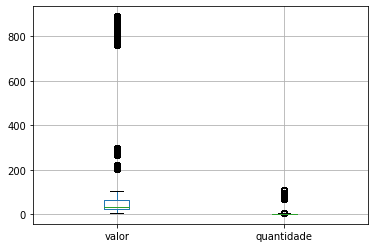

In [ ]:
dados_2019[['valor', 'quantidade']].boxplot()

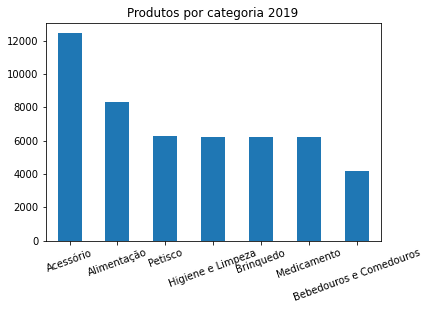

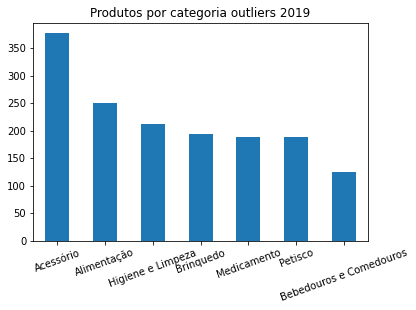

In [ ]:
plt.subplots()
dados_2019['categoriaprod'].value_counts().plot(kind='bar', title='Produtos por categoria 2019')
plt.xticks(rotation=20)
plt.show()

plt.subplots()
outliers['categoriaprod'].value_counts().plot(kind='bar', title='Produtos por categoria outliers 2019')
plt.xticks(rotation=20)
plt.show()

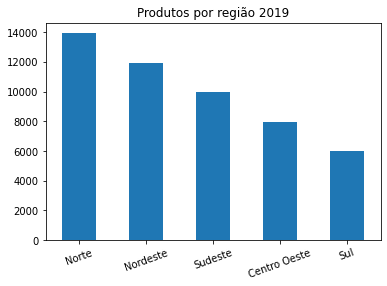

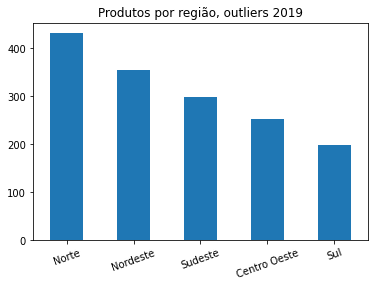

In [ ]:
plt.subplots()

dados_2019['regiao_pais'].value_counts().plot(kind='bar', title='Produtos por região 2019')
plt.xticks(rotation=20)
plt.show()

plt.subplots()

outliers['regiao_pais'].value_counts().plot(kind='bar', title='Produtos por região, outliers 2019')
plt.xticks(rotation=20)
plt.show()

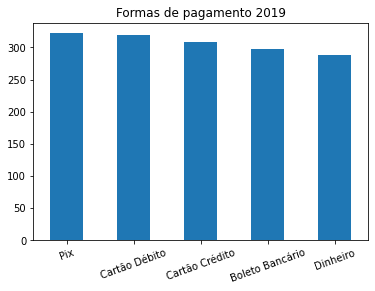

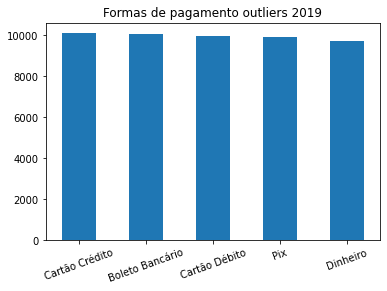

In [ ]:
plt.subplots()

outliers['formapagto'].value_counts().plot(kind='bar', title='Formas de pagamento 2019')
plt.xticks(rotation=20)
plt.show()

plt.subplots()

dados_2019['formapagto'].value_counts().plot(kind='bar', title='Formas de pagamento outliers 2019')
plt.xticks(rotation=20)
plt.show()

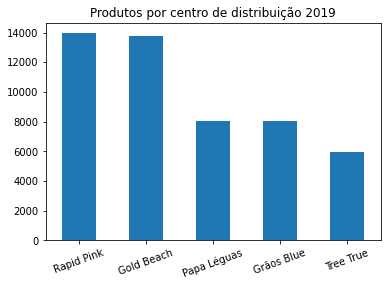

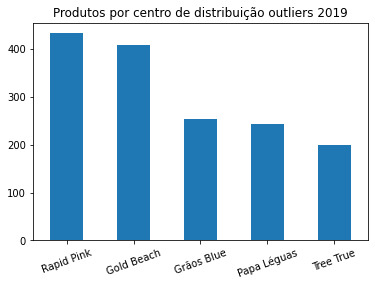

In [ ]:
plt.subplots()

dados_2019['centro_distribuicao'].value_counts().plot(kind='bar', title='Produtos por centro de distribuição 2019')
plt.xticks(rotation=20)
plt.show()

plt.subplots()

outliers['centro_distribuicao'].value_counts().plot(kind='bar', title='Produtos por centro de distribuição outliers 2019')
plt.xticks(rotation=20)
plt.show()

In [ ]:
lucro_total = dados_2019['lucro_liquido'].sum()
quantidade_total = dados_2019['quantidade'].sum()

In [ ]:
lucro_outliers = outliers['lucro_liquido'].sum()
quantidade_outliers = outliers['quantidade'].sum()

In [ ]:
print('Quantidade de unidades vendidas:{:,} \nLucro líquido total: R${:,.2f}'.format(quantidade_outliers, lucro_outliers))

Quantidade de unidades vendidas:136,099.0 
Lucro líquido total: R$5,497,207.98


In [ ]:
print('Quantidade de unidades vendidas:{:,} \nLucro líquido total: R${:,.2f}'.format(quantidade_total, lucro_total))

Quantidade de unidades vendidas:214,942.0 
Lucro líquido total: R$8,249,981.37


In [ ]:
lucro_pct = (lucro_outliers * 100) / lucro_total
print("Porcetagem de lucro ocasionado por outliers: {:.2f}%".format(lucro_pct))

Porcetagem de lucro ocasionado por outliers: 66.63%


In [ ]:
quantidade_pct = (quantidade_outliers * 100) / quantidade_total
print("Porcetagem de unidades vendidas ocasionadas por outliers: {:.2f}%".format(quantidade_pct))

Porcetagem de unidades vendidas ocasionadas por outliers: 63.32%


# Dados 2020

In [ ]:
dados_2020 = df_concat[pd.DatetimeIndex(df_concat['data']).year == 2020]

In [ ]:
dados_2020.shape

(49615, 16)

## Análise Outliers 2020

In [ ]:
outliers = dados_2020.loc[dados_2020['Outlier'] == True]
outliers

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,std*1.96,Outlier
80,50364,Sudeste,Penas Gatito,20.16,33.0,665.28,2020-02-21,São Paulo,Pix,Papa Léguas,Miriam,19.80,356.40,Brinquedo,23.627926,True
145,50429,Centro Oeste,Roupa para Cão Billaboard,50.40,32.0,1612.80,2020-04-10,Mato Grosso,Boleto Bancário,Grãos Blue,Andressa,37.12,844.80,Acessório,23.627926,True
174,50458,Nordeste,Vitamina E Granulado BigForce,77.28,33.0,2550.24,2020-02-23,Bahia,Cartão Crédito,Gold Beach,Sonia,93.72,1107.15,Medicamento,23.627926,True
188,50472,Norte,Antipulgas e Carrapatos MSD Bravecto para Pet ...,316.96,34.0,10776.64,2020-12-22,Amapá,Cartão Crédito,Rapid Pink,Maria Linda,395.76,5460.40,Medicamento,23.627926,True
294,50578,Norte,"Ração Royal Canin Exigent Gatos Adultos 1,5Kg",100.80,34.0,3427.20,2020-12-22,Acre,Cartão Crédito,Rapid Pink,Carlos,125.12,1666.00,Alimentação,23.627926,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49947,100231,Norte,Shampoo vegano para cachorro e gato de camomil...,28.00,73.0,2044.00,2020-04-10,Rondônia,Boleto Bancário,Rapid Pink,Yuri,50.37,1576.80,Higiene e Limpeza,23.627926,True
49992,100276,Nordeste,Bebedouro e Comedouro Automático para Cães e G...,42.56,70.0,2979.20,2020-02-10,Maranhão,Pix,Gold Beach,Clarice,73.50,1365.00,Bebedouros e Comedouros,23.627926,True
50019,100303,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,981.12,73.0,71621.76,2020-03-10,Pernambuco,Boleto Bancário,Gold Beach,Claudio,4307.73,17563.80,Bebedouros e Comedouros,23.627926,True
50050,100334,Sul,Ração Royal Canin Club Performance para Cães A...,230.72,71.0,16381.12,2020-02-22,Paraná,Boleto Bancário,Tree True,Beatriz,291.10,5935.60,Alimentação,23.627926,True


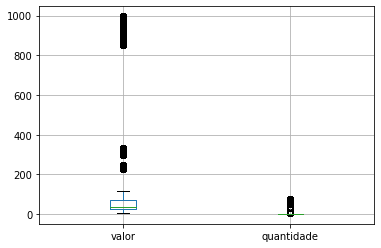

In [ ]:
dados_2020[['valor', 'quantidade']].boxplot()

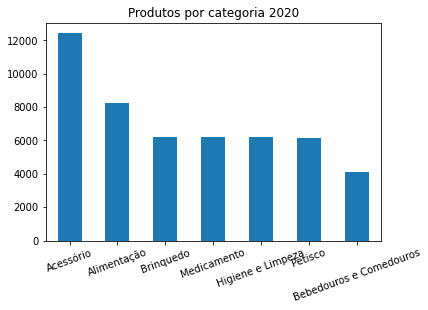

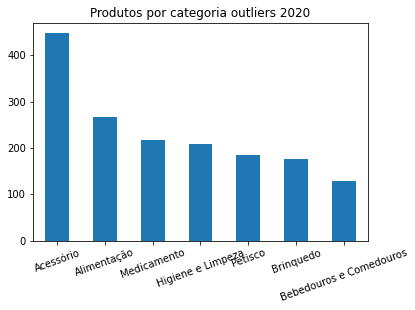

In [ ]:
plt.subplots()
dados_2020['categoriaprod'].value_counts().plot(kind='bar', title='Produtos por categoria 2020')
plt.xticks(rotation=20)
plt.show()

plt.subplots()
outliers['categoriaprod'].value_counts().plot(kind='bar', title='Produtos por categoria outliers 2020')
plt.xticks(rotation=20)
plt.show()

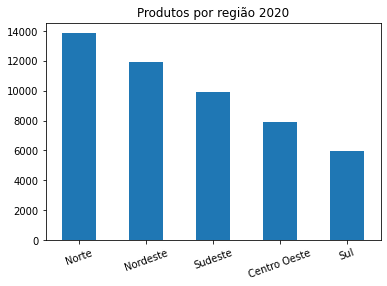

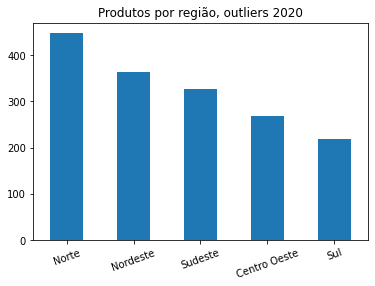

In [ ]:
plt.subplots()

dados_2020['regiao_pais'].value_counts().plot(kind='bar', title='Produtos por região 2020')
plt.xticks(rotation=20)
plt.show()

plt.subplots()

outliers['regiao_pais'].value_counts().plot(kind='bar', title='Produtos por região, outliers 2020')
plt.xticks(rotation=20)
plt.show()

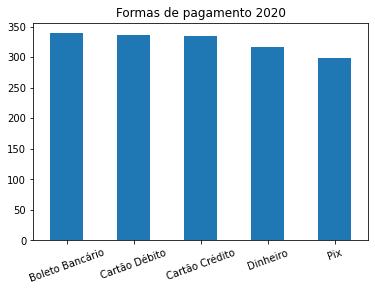

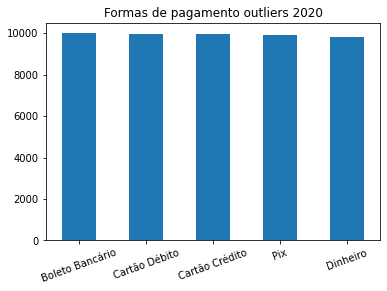

In [ ]:
plt.subplots()

outliers['formapagto'].value_counts().plot(kind='bar', title='Formas de pagamento 2020')
plt.xticks(rotation=20)
plt.show()

plt.subplots()

dados_2020['formapagto'].value_counts().plot(kind='bar', title='Formas de pagamento outliers 2020')
plt.xticks(rotation=20)
plt.show()

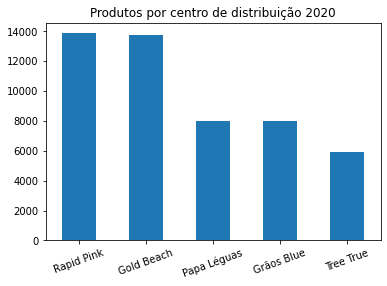

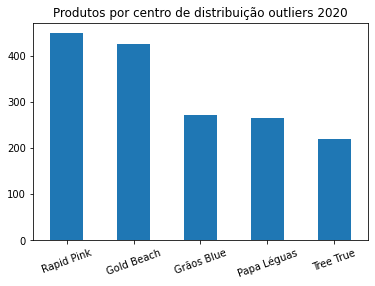

In [ ]:
plt.subplots()
dados_2020['centro_distribuicao'].value_counts().plot(kind='bar', title='Produtos por centro de distribuição 2020')
plt.xticks(rotation=20)
plt.show()

plt.subplots()
outliers['centro_distribuicao'].value_counts().plot(kind='bar', title='Produtos por centro de distribuição outliers 2020')
plt.xticks(rotation=20)
plt.show()

In [ ]:
lucro_total = dados_2020['lucro_liquido'].sum()
quantidade_total = dados_2020['quantidade'].sum()


lucro_outliers = outliers['lucro_liquido'].sum()
quantidade_outliers = outliers['quantidade'].sum()

In [ ]:
print('Quantidade de unidades vendidas outliers:{:,} \nLucro líquido total: R${:,.2f}'.format(quantidade_outliers, lucro_outliers))

Quantidade de unidades vendidas outliers:105,306.0 
Lucro líquido total: R$3,841,654.76


In [ ]:
print('Quantidade de unidades vendidas total:{:,} \nLucro líquido total: R${:,.2f}'.format(quantidade_total, lucro_total))

Quantidade de unidades vendidas total:183,481.0 
Lucro líquido total: R$6,575,156.26


In [ ]:
lucro_pct = (lucro_outliers * 100) / lucro_total
print("Porcetagem de lucro ocasionado por outliers: {:.2f}%".format(lucro_pct))

Porcetagem de lucro ocasionado por outliers: 58.43%


In [ ]:
quantidade_pct = (quantidade_outliers * 100) / quantidade_total
print("Porcetagem de unidades vendidas ocasionadas por outliers: {:.2f}%".format(quantidade_pct))

Porcetagem de unidades vendidas ocasionadas por outliers: 57.39%


# Dados 2021

In [ ]:
dados_2021 = df_concat[pd.DatetimeIndex(df_concat['data']).year == 2021]

In [ ]:
outliers = dados_2021.loc[dados_2021['Outlier'] == True]
outliers

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,std*1.96,Outlier
1443,102010,Norte,Biscoito True Champion 300g,27.93,40.0,1117.20,2021-02-11,Amazonas,Cartão Crédito,Rapid Pink,Silvia,16.80,336.00,Alimentação,23.627926,True
2180,102747,Sudeste,Roupa para Gato Petti,37.24,83.0,3090.92,2021-12-24,São Paulo,Boleto Bancário,Papa Léguas,Miriam,69.72,1208.48,Acessório,23.627926,True
2184,102751,Sul,Roupa para Gato Petti,51.87,83.0,4305.21,2021-12-22,Paraná,Boleto Bancário,Tree True,Beatriz,97.11,1683.24,Acessório,23.627926,True
2233,102800,Sudeste,Vitamina E Granulado BigForce,91.77,83.0,7616.91,2021-12-25,Espírito Santo,Boleto Bancário,Papa Léguas,Tereza,229.08,3149.85,Medicamento,23.627926,True
2241,102808,Norte,Antipulgas e Carrapatos MSD Bravecto para Pet ...,351.12,83.0,29142.96,2021-11-10,Tocantins,Pix,Rapid Pink,Dolores,876.48,12051.60,Medicamento,23.627926,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49905,150472,Nordeste,Whiskas Petisco Temptations Anti Bola de Pelo 40g,9.31,88.0,819.28,2021-04-10,Pernambuco,Cartão Débito,Gold Beach,Claudio,18.48,184.80,Petisco,23.627926,True
49918,150485,Norte,Pote Petisco Para Cachorro Bifinho Sabor Carne...,42.56,88.0,3745.28,2021-04-10,Tocantins,Pix,Rapid Pink,Dolores,112.64,1126.40,Petisco,23.627926,True
49968,150535,Norte,Cama Coração Coroa Pet Nest Almofada Lavável,115.71,88.0,10182.48,2021-04-10,Tocantins,Dinheiro,Rapid Pink,Dolores,382.80,4593.60,Acessório,23.627926,True
49970,150537,Norte,Cama Coração Coroa Pet Nest Almofada Lavável,115.71,88.0,10182.48,2021-02-14,Amazonas,Boleto Bancário,Rapid Pink,Silvia,382.80,4593.60,Acessório,23.627926,True


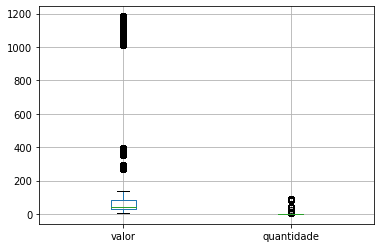

In [ ]:
dados_2021[['valor', 'quantidade']].boxplot()

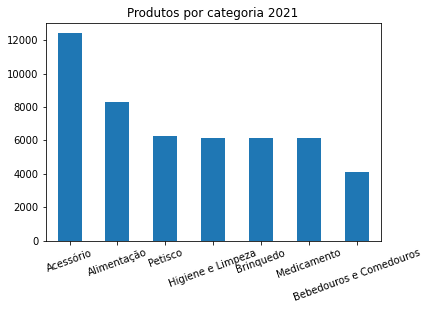

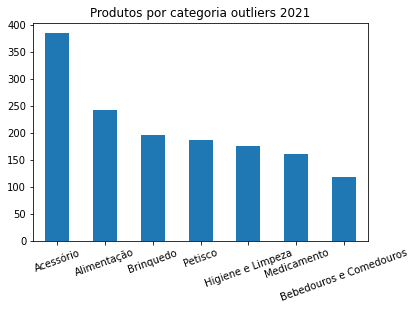

In [ ]:
plt.subplots()
dados_2021['categoriaprod'].value_counts().plot(kind='bar', title='Produtos por categoria 2021')
plt.xticks(rotation=20)
plt.show()

plt.subplots()
outliers['categoriaprod'].value_counts().plot(kind='bar', title='Produtos por categoria outliers 2021')
plt.xticks(rotation=20)
plt.show()

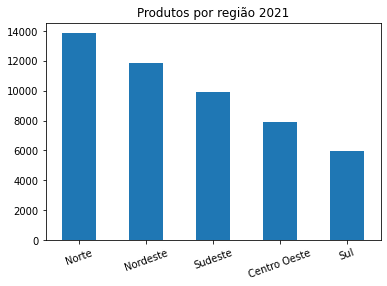

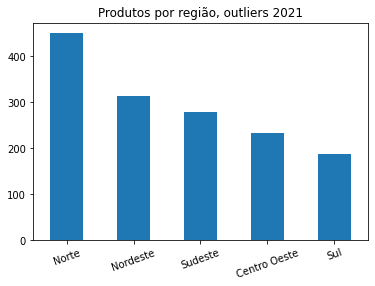

In [ ]:
plt.subplots()

dados_2021['regiao_pais'].value_counts().plot(kind='bar', title='Produtos por região 2021')
plt.xticks(rotation=20)
plt.show()

plt.subplots()

outliers['regiao_pais'].value_counts().plot(kind='bar', title='Produtos por região, outliers 2021')
plt.xticks(rotation=20)
plt.show()

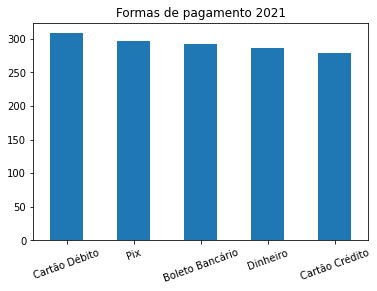

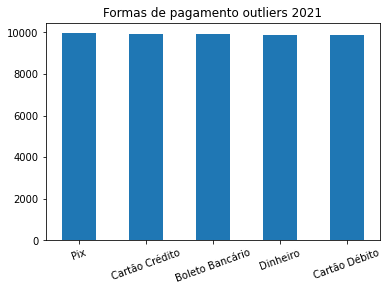

In [ ]:
plt.subplots()

outliers['formapagto'].value_counts().plot(kind='bar', title='Formas de pagamento 2021')
plt.xticks(rotation=20)
plt.show()

plt.subplots()

dados_2021['formapagto'].value_counts().plot(kind='bar', title='Formas de pagamento outliers 2021')
plt.xticks(rotation=20)
plt.show()

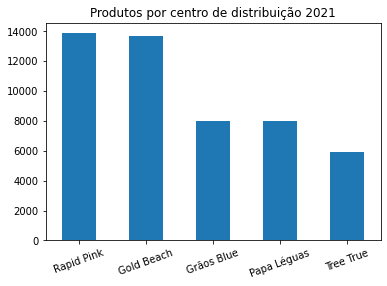

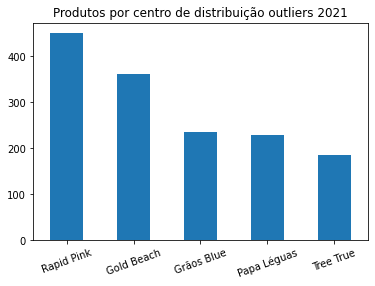

In [ ]:
plt.subplots()
dados_2021['centro_distribuicao'].value_counts().plot(kind='bar', title='Produtos por centro de distribuição 2021')
plt.xticks(rotation=20)
plt.show()

plt.subplots()
outliers['centro_distribuicao'].value_counts().plot(kind='bar', title='Produtos por centro de distribuição outliers 2021')
plt.xticks(rotation=20)
plt.show()

In [ ]:
lucro_total = dados_2021['lucro_liquido'].sum()
quantidade_total = dados_2021['quantidade'].sum()


lucro_outliers = outliers['lucro_liquido'].sum()
quantidade_outliers = outliers['quantidade'].sum()

In [ ]:
print('Quantidade de unidades vendidas outliers:{:,} \nLucro líquido total: R${:,.2f}'.format(quantidade_outliers, lucro_outliers))

Quantidade de unidades vendidas outliers:118,165.0 
Lucro líquido total: R$4,569,640.79


In [ ]:
print('Quantidade de unidades vendidas total:{:,} \nLucro líquido total: R${:,.2f}'.format(quantidade_total, lucro_total))

Quantidade de unidades vendidas total:199,183.0 
Lucro líquido total: R$7,414,996.34


In [ ]:
lucro_pct = (lucro_outliers * 100) / lucro_total
print("Porcetagem de lucro ocasionado por outliers: {:.2f}%".format(lucro_pct))

Porcetagem de lucro ocasionado por outliers: 61.63%


In [ ]:
quantidade_pct = (quantidade_outliers * 100) / quantidade_total
print("Porcetagem de unidades vendidas ocasionadas por outliers: {:.2f}%".format(quantidade_pct))

Porcetagem de unidades vendidas ocasionadas por outliers: 59.32%


# Dados 2022

In [ ]:
dados_2022 = df_concat[pd.DatetimeIndex(df_concat['data']).year == 2022]

In [ ]:
dados_2022.shape

(49883, 16)

In [ ]:
outliers = dados_2022.loc[dados_2022['Outlier'] == True]
outliers

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,std*1.96,Outlier
33,150614,Centro Oeste,Bola Pet Vinil Big Blue,30.78,40.0,1231.20,2022-02-26,Mato Grosso,Cartão Débito,Grãos Blue,Andressa,7.60,304.0,Brinquedo,23.627926,True
3912,154493,Nordeste,Kit Banho e Tosa com Escova PetShop Cãopeon,110.16,34.0,3745.44,2022-01-03,Bahia,Cartão Débito,Gold Beach,Sonia,110.50,1768.0,Higiene e Limpeza,23.627926,True
3952,154533,Norte,Nutri Alimentador Inteligente Automático Câmer...,1367.28,36.0,49222.08,2022-02-27,Pará,Pix,Rapid Pink,Julia,2212.56,9482.4,Bebedouros e Comedouros,23.627926,True
3959,154540,Centro Oeste,Nutri Alimentador Inteligente Automático Câmer...,1362.42,35.0,47684.70,2022-07-04,Mato Grosso do Sul,Dinheiro,Grãos Blue,Ligia,1888.95,8095.5,Bebedouros e Comedouros,23.627926,True
3996,154577,Sudeste,Ração Royal Canin Club Performance para Cães A...,353.16,34.0,12007.44,2022-02-27,Espírito Santo,Cartão Débito,Papa Léguas,Tereza,142.12,2842.4,Alimentação,23.627926,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50125,200706,Norte,Bebedouro e Comedouro Automático para Cães e G...,69.66,44.0,3065.04,2022-02-27,Acre,Dinheiro,Rapid Pink,Carlos,52.80,880.0,Bebedouros e Comedouros,23.627926,True
50185,200766,Centro Oeste,Ração Royal Canin Club Performance para Cães A...,346.68,45.0,15600.60,2022-07-04,Distrito Federal,Pix,Grãos Blue,Lucia,190.80,3816.0,Alimentação,23.627926,True
50193,200774,Sudeste,Ração Royal Canin Club Performance para Cães A...,353.16,42.0,14832.72,2022-01-03,São Paulo,Pix,Papa Léguas,Miriam,180.60,3612.0,Alimentação,23.627926,True
50219,200800,Sudeste,"Ração Royal Canin Exigent Gatos Adultos 1,5Kg",153.90,43.0,6617.70,2022-02-27,Minas Gerais,Cartão Crédito,Papa Léguas,Monique,87.72,2193.0,Alimentação,23.627926,True


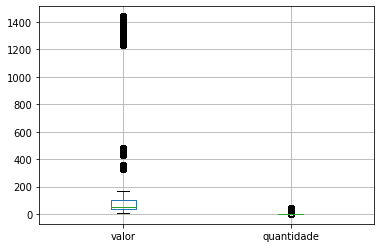

In [ ]:
dados_2022[['valor', 'quantidade']].boxplot()

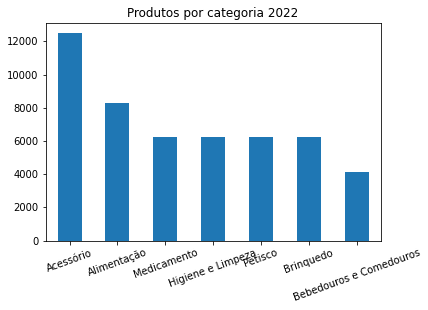

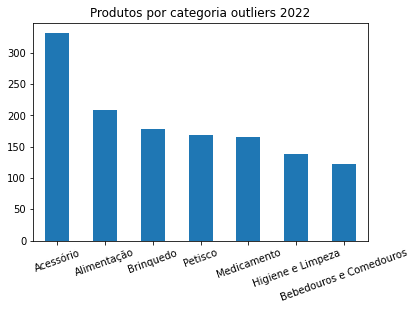

In [ ]:
plt.subplots()
dados_2022['categoriaprod'].value_counts().plot(kind='bar', title='Produtos por categoria 2022')
plt.xticks(rotation=20)
plt.show()

plt.subplots()
outliers['categoriaprod'].value_counts().plot(kind='bar', title='Produtos por categoria outliers 2022')
plt.xticks(rotation=20)
plt.show()

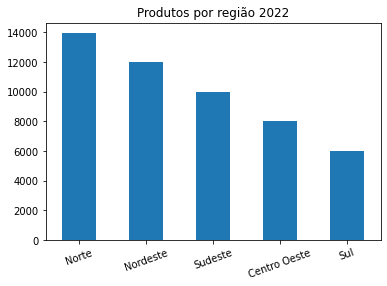

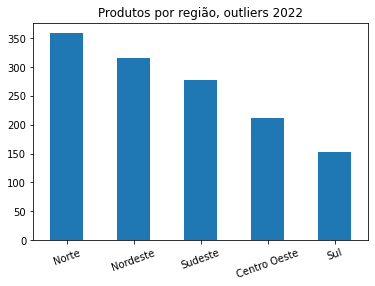

In [ ]:
plt.subplots()

dados_2022['regiao_pais'].value_counts().plot(kind='bar', title='Produtos por região 2022')
plt.xticks(rotation=20)
plt.show()

plt.subplots()

outliers['regiao_pais'].value_counts().plot(kind='bar', title='Produtos por região, outliers 2022')
plt.xticks(rotation=20)
plt.show()

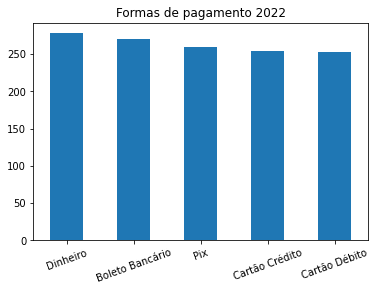

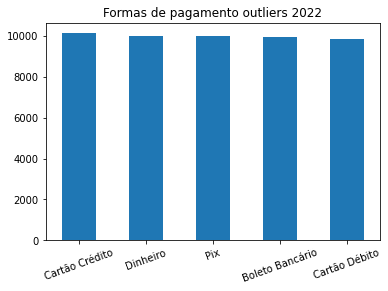

In [ ]:
plt.subplots()

outliers['formapagto'].value_counts().plot(kind='bar', title='Formas de pagamento 2022')
plt.xticks(rotation=20)
plt.show()

plt.subplots()

dados_2022['formapagto'].value_counts().plot(kind='bar', title='Formas de pagamento outliers 2022')
plt.xticks(rotation=20)
plt.show()

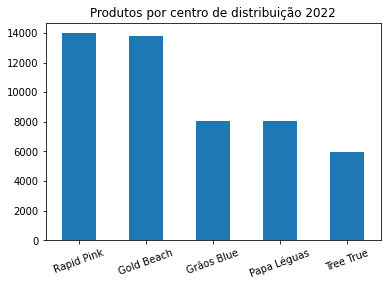

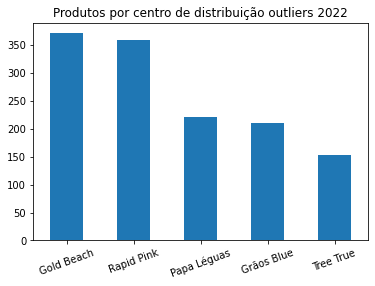

In [ ]:
plt.subplots()
dados_2022['centro_distribuicao'].value_counts().plot(kind='bar', title='Produtos por centro de distribuição 2022')
plt.xticks(rotation=20)
plt.show()

plt.subplots()
outliers['centro_distribuicao'].value_counts().plot(kind='bar', title='Produtos por centro de distribuição outliers 2022')
plt.xticks(rotation=20)
plt.show()

In [ ]:
lucro_total = dados_2022['lucro_liquido'].sum()
quantidade_total = dados_2022['quantidade'].sum()


lucro_outliers = outliers['lucro_liquido'].sum()
quantidade_outliers = outliers['quantidade'].sum()

In [ ]:
print('Quantidade de unidades vendidas outliers:{:,} \nLucro líquido total: R${:,.2f}'.format(quantidade_outliers, lucro_outliers))

Quantidade de unidades vendidas outliers:47,391.0 
Lucro líquido total: R$1,861,827.60


In [ ]:
print('Quantidade de unidades vendidas total:{:,} \nLucro líquido total: R${:,.2f}'.format(quantidade_total, lucro_total))

Quantidade de unidades vendidas total:128,656.0 
Lucro líquido total: R$4,734,864.37


In [ ]:
lucro_pct = (lucro_outliers * 100) / lucro_total
print("Porcetagem de lucro ocasionado por outliers: {:.2f}%".format(lucro_pct))

Porcetagem de lucro ocasionado por outliers: 39.32%


In [ ]:
quantidade_pct = (quantidade_outliers * 100) / quantidade_total
print("Porcetagem de unidades vendidas ocasionadas por outliers: {:.2f}%".format(quantidade_pct))

Porcetagem de unidades vendidas ocasionadas por outliers: 36.84%
